# Exploratory Data Analysis on Diabetes of Females

## About Dataset

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

## Data Dictionary

* **Pregnancies**: This is an integer to express the Number of pregnancies of a female.
* **Glucose**: This is an integer to express the Glucose level in blood. It is checked by Glucose tolerance test. Normal Glucose Level is Less than 100mg/dL. If it is 100-125mg/dL then the patient may have prediabetes. If it is more than 125mg/dL the patient may have diabetes.
* **BloodPressure**: This is an integer to express the Blood pressure measurement. people with high blood pressure usually have insulin resistance and have an increased risk of developing diabetes compared to those with typical blood pressure.
* **SkinThickness**: This is an integer to express the thickness of the skin. Study findings showed that skin thickness decreased as a result of diabetic progression. Skin thickness was significantly influenced by insulin level, but not glucose level.
* **Insulin**: This is an integer to express the Insulin level in blood. Lower Insulin level causes diabetes.
* **BMI**: This is an integer to express the Body mass index. Higher BMI may cause diabetes.
* **DiabetesPedigreeFunction**: This is an integer to express the Diabetes percentage. Diabetes pedigree function (DPF) calculates diabetes likelihood depending on the subject's age and his/her diabetic family history.
* **Age**: This is an integer to express the age of the patient.
* **Outcome**: This is categorised the final result 1 is Yes (i.e. Presence of Diabetes)and 0 is No.

## Problem Statement

* Conduct an in-depth Exploratory Data Analysis on a dataset, uncovering insights, patterns, and relationships within the data.
* Find the features those are significant in prediction of diabetes.



In [1]:
# Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
folderpath = "drive/MyDrive/Colab Notebooks/dscourse/data"

In [6]:
csvpath = os.path.join(folderpath, "diabetes.csv")
df = pd.read_csv(csvpath)

## View first and last 10 rows

In [7]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [8]:
df.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Observarions of shape of data, datatypes of all attributes, missing value detecion and statistical summary

* Shape of Data

In [9]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns or features: {df.shape[1]}")

Number of rows: 768
Number of columns or features: 9


* Datatypes of Attributes

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* Missing Value Detection

In [11]:
def missing_df(data):
  total_missing = data.isnull().sum().sort_values(ascending=False)
  percentage_missing = (data.isnull().sum() / data.isnull().count() * 100).sort_values(ascending= False)
  missing_value_df = pd.concat([total_missing, percentage_missing], axis = 1, keys=["Total", "Percentage"])
  return missing_value_df

In [12]:
missing = missing_df(df)
missing[missing['Total'] > 0]

,Total,Percentage


* Statistical Summary

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
print("="*60)
print(f"Statistical Summary of all feature:")
print("="*60)
for col in df.columns:
  if len(df[col].value_counts()) > 10:
    # Numeric in nature
    print(f"Mean of {col} is {df[col].mean()}")
    print(f"Median of {col} is {df[col].median()}")
    print('-'* 60)
  else:
    # Categorical in nature
    print(f"Number of Unique Values in {col}: {df[col].nunique()}")
    print(f"Unique Values in {col} : {df[col].unique()}")
    print('-'* 40)

Statistical Summary of all feature:
Mean of Pregnancies is 3.8450520833333335
Median of Pregnancies is 3.0
------------------------------------------------------------
Mean of Glucose is 120.89453125
Median of Glucose is 117.0
------------------------------------------------------------
Mean of BloodPressure is 69.10546875
Median of BloodPressure is 72.0
------------------------------------------------------------
Mean of SkinThickness is 20.536458333333332
Median of SkinThickness is 23.0
------------------------------------------------------------
Mean of Insulin is 79.79947916666667
Median of Insulin is 30.5
------------------------------------------------------------
Mean of BMI is 31.992578124999998
Median of BMI is 32.0
------------------------------------------------------------
Mean of DiabetesPedigreeFunction is 0.47187630208333325
Median of DiabetesPedigreeFunction is 0.3725
------------------------------------------------------------
Mean of Age is 33.240885416666664
Median o

## Univariate Analysis

#### Distribution plots for continuous variables and Bar/Count Plots for Discrete/Categorical Variables.

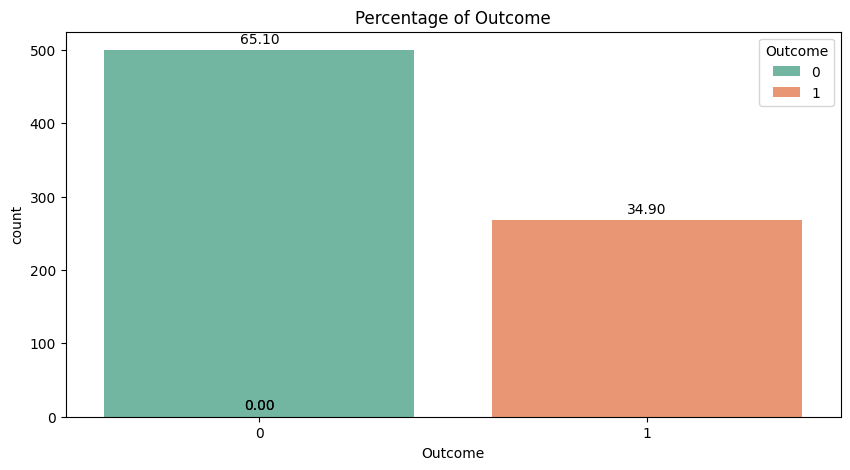

In [15]:
plt.figure(figsize=(10,5))
plots = sns.countplot(data=df, x="Outcome", hue="Outcome", palette="Set2")
sum_patches = sum([plots.patches[i].get_height() for i in range(len(plots.patches))])

# Iterating over bars step-by-step
for bar in plots.patches:
  # Passing annotate function of matplotlib
  # and passing the co-ordinates where annotation can be shown
  plots.annotate(format((bar.get_height() / sum_patches) * 100, '0.2f'),
                 (bar.get_x() + bar.get_width()/2, bar.get_height()),
                 ha ="center", va="center",
                 size=10, xytext=(0,8),
                 textcoords="offset points")
  plt.title("Percentage of Outcome")

In [16]:
def distribution_plots(df, x, hue):
  '''
  This function visualize the distribution of a variable using KDE and CDF plots
  df: Data frame
  x: Column in x axis
  hue: Column for hue
  '''

  fig, axes = plt.subplots(1, 2, figsize=(12, 6))
  # Plot 1: KDE Plot
  sns.kdeplot(ax=axes[0], data=df, x= x, hue= hue, palette="Set2")
  axes[0].set_title(f"Distribution plot for {x} with {hue}")
  axes[0].grid(True)

  # Plot 2: CDF Plot
  sns.kdeplot(ax= axes[1], data=df, x= x, hue= hue, palette="Set1", cumulative=True, common_norm= False, common_grid= True)
  axes[1].set_title(f"CDF of {x} with {hue}")
  axes[1].grid(True)


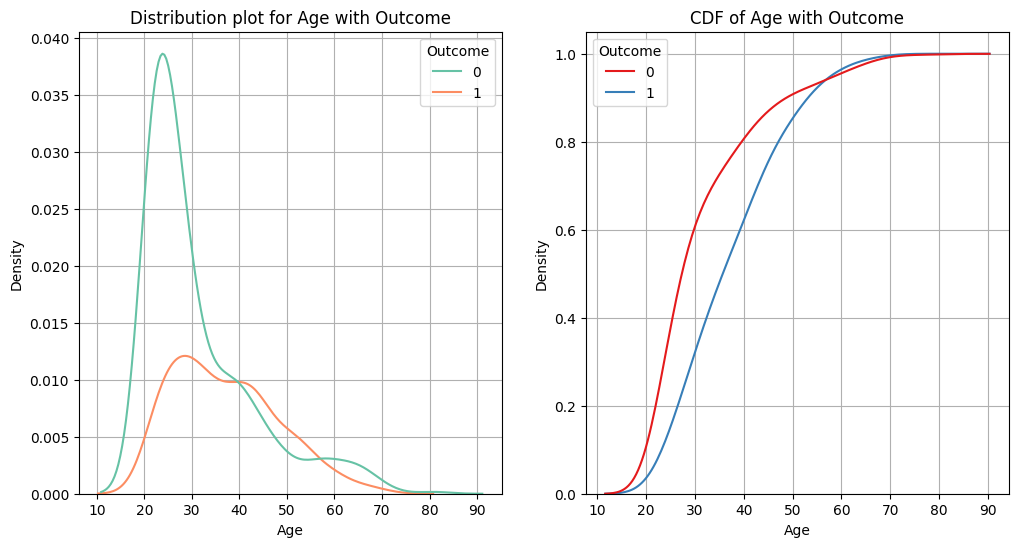

In [17]:
distribution_plots(df, "Age","Outcome")

### Observations

* Age is normally distributed. Slightly right skewed above 50 years.
* Most of the diabetes patient found at the age 30 to 48 years.

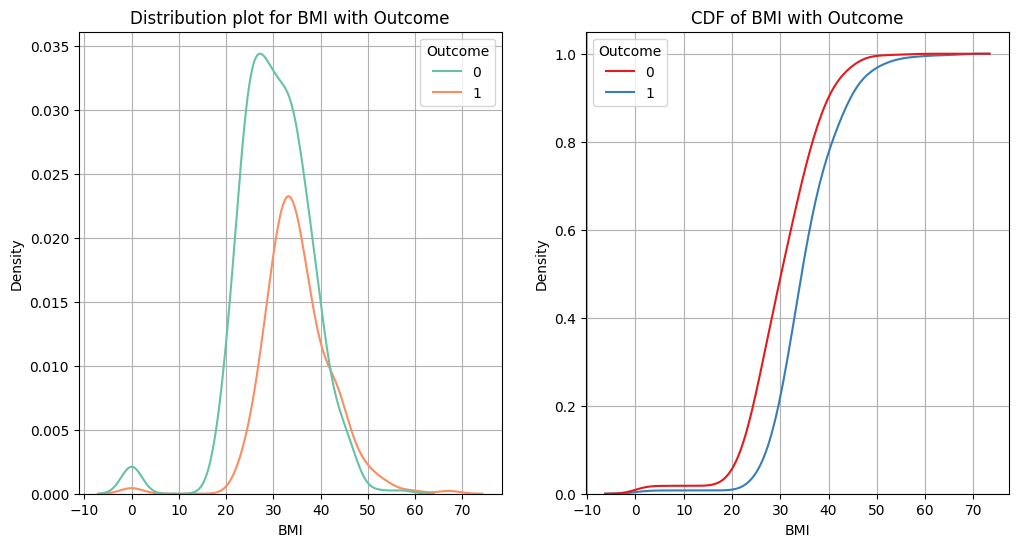

In [18]:
distribution_plots(df, "BMI", "Outcome")

### Observations

* BMI is normally distributed.
* BMI of diabestes patients are higher than non- diabetes patients.
* Most of the diabetes patients have BMI between 30 to 40
* There are few patients having BMI 0 which may be outlier.

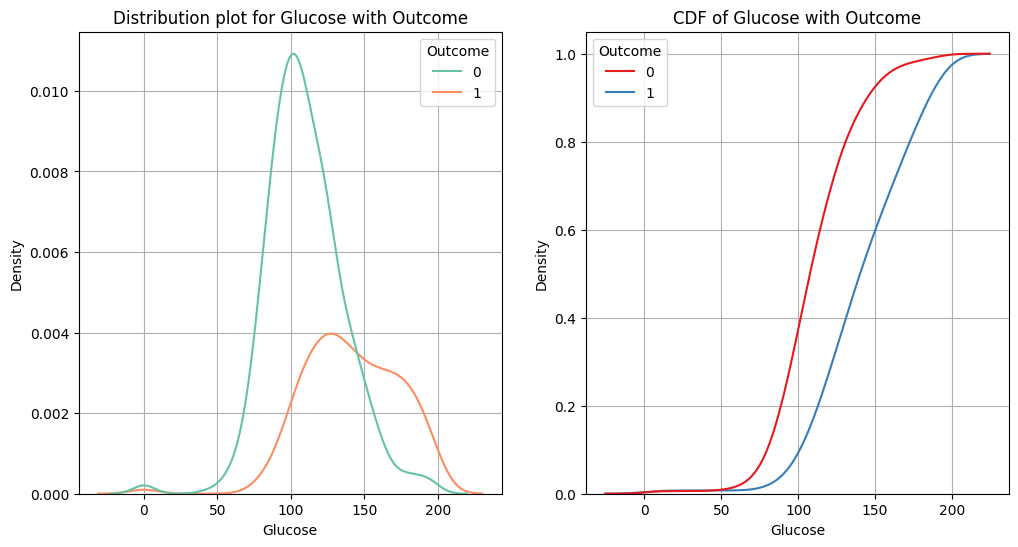

In [19]:
distribution_plots(df, "Glucose", "Outcome")

### Observations

* Glucose is normally distributed.
* Glucose or Blood Sugar level of diabestes patients are higher than non- diabetes patients.
* Most of the diabetes patients have Glucose Level above 125.
* There are few patients having Glucose level 0 which may be outlier.

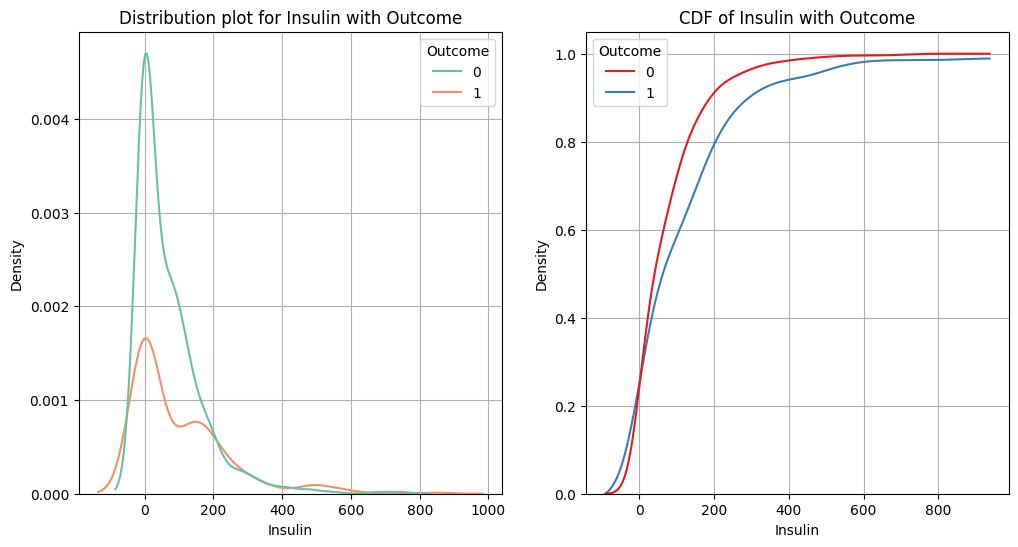

In [20]:
distribution_plots(df, "Insulin", "Outcome")

### Observations

* Insulin is normally distributed. Slightly right skewed above 300.
* Most of the diabetes patients have Insulin level below 200.

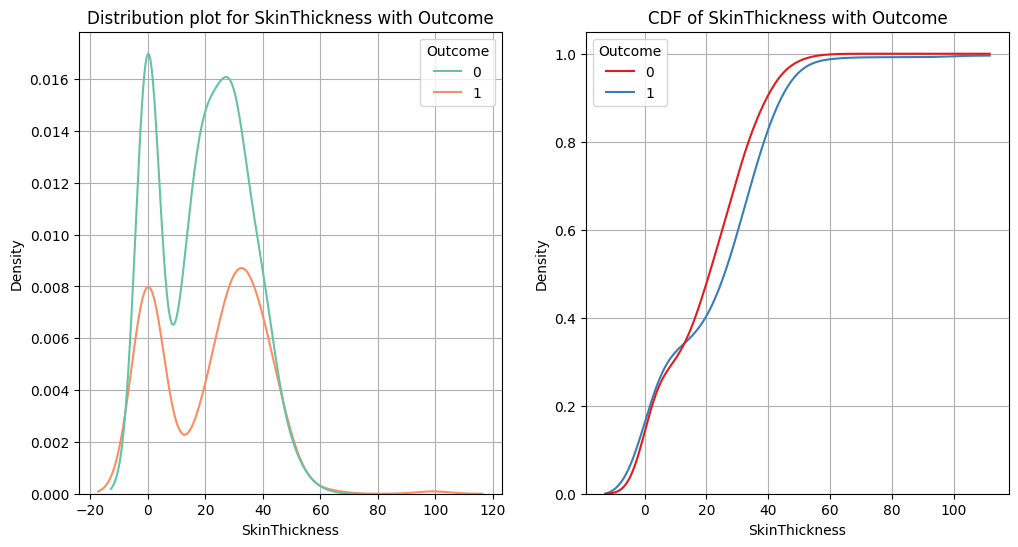

In [21]:
distribution_plots(df, "SkinThickness", "Outcome")

### Observations

* Skin Thickness of diabetes patients are slightly higher.
* Most of the diabetes patients have skin thickness 35 to 40.

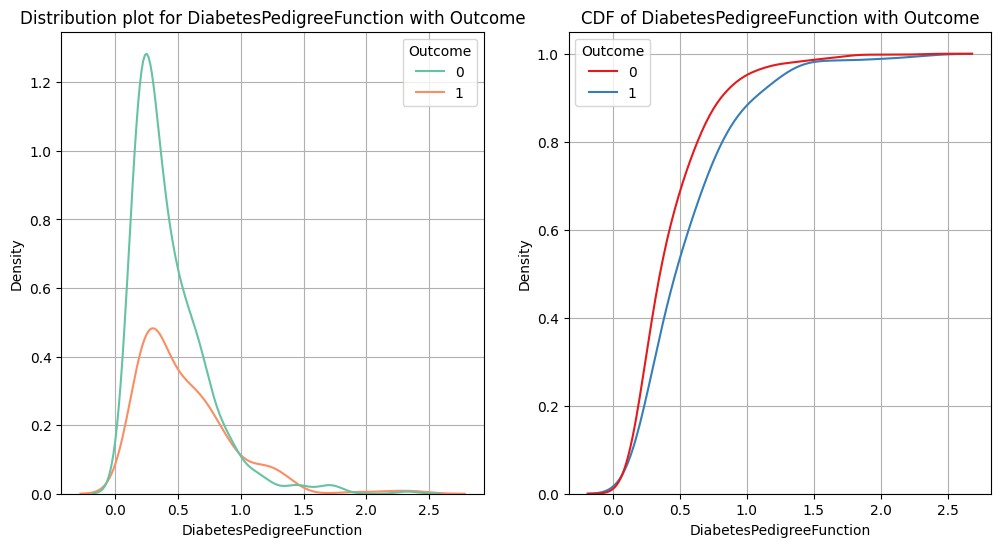

In [22]:
distribution_plots(df, "DiabetesPedigreeFunction", "Outcome")

### Observations

* Diabetes Percentage is normally distributed. Slightly right skewed above 1.0.
* Diabetes Percentage is higher for diabetes patients.
* Most of the diabetes patients have diabetes percentage 0.3.

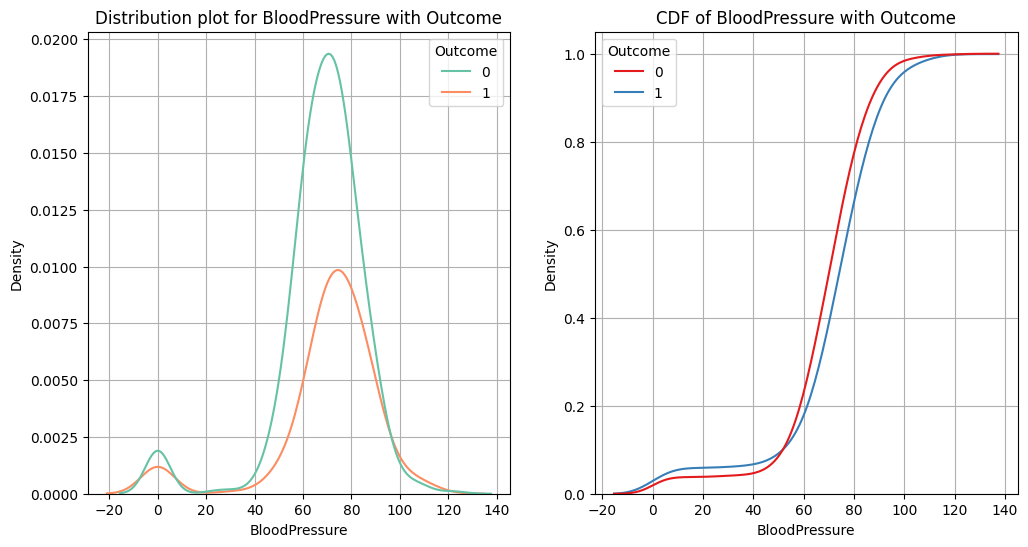

In [23]:
distribution_plots(df, "BloodPressure", "Outcome")

### Observations

* Blood Pressure is normally distributed.
* Blood Pressure level of diabestes patients are slightly higher than non- diabetes patients.
* Most of the diabetes patients have Blood Pressure Level 75.
* There are few patients having Blood Pressure level 0 which may be outlier.

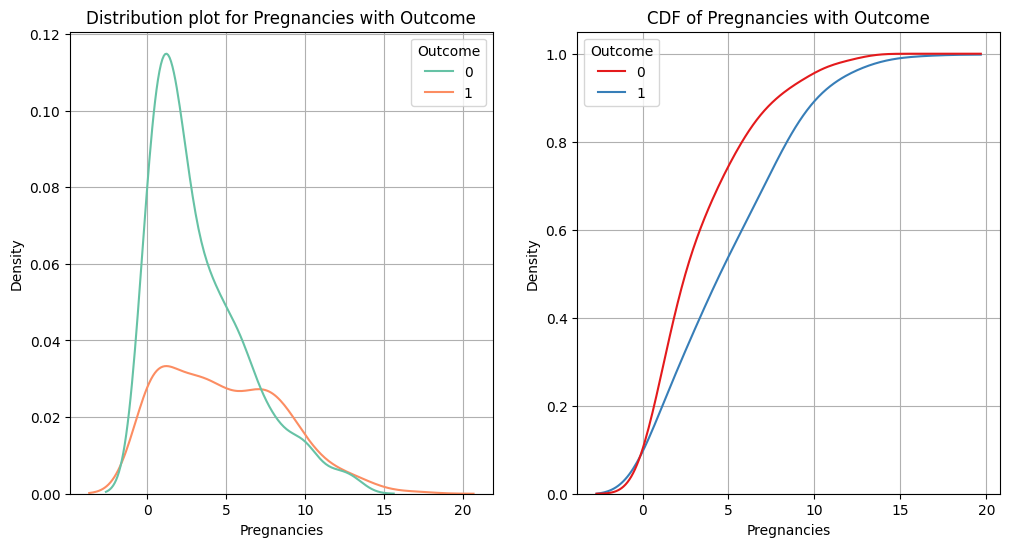

In [24]:
distribution_plots(df, "Pregnancies", "Outcome")

### Observations

* Pregnancies is normally distributed.
* Diabetes patients found mostly having 1 or more pregnancies.

## Bivariate Analysis

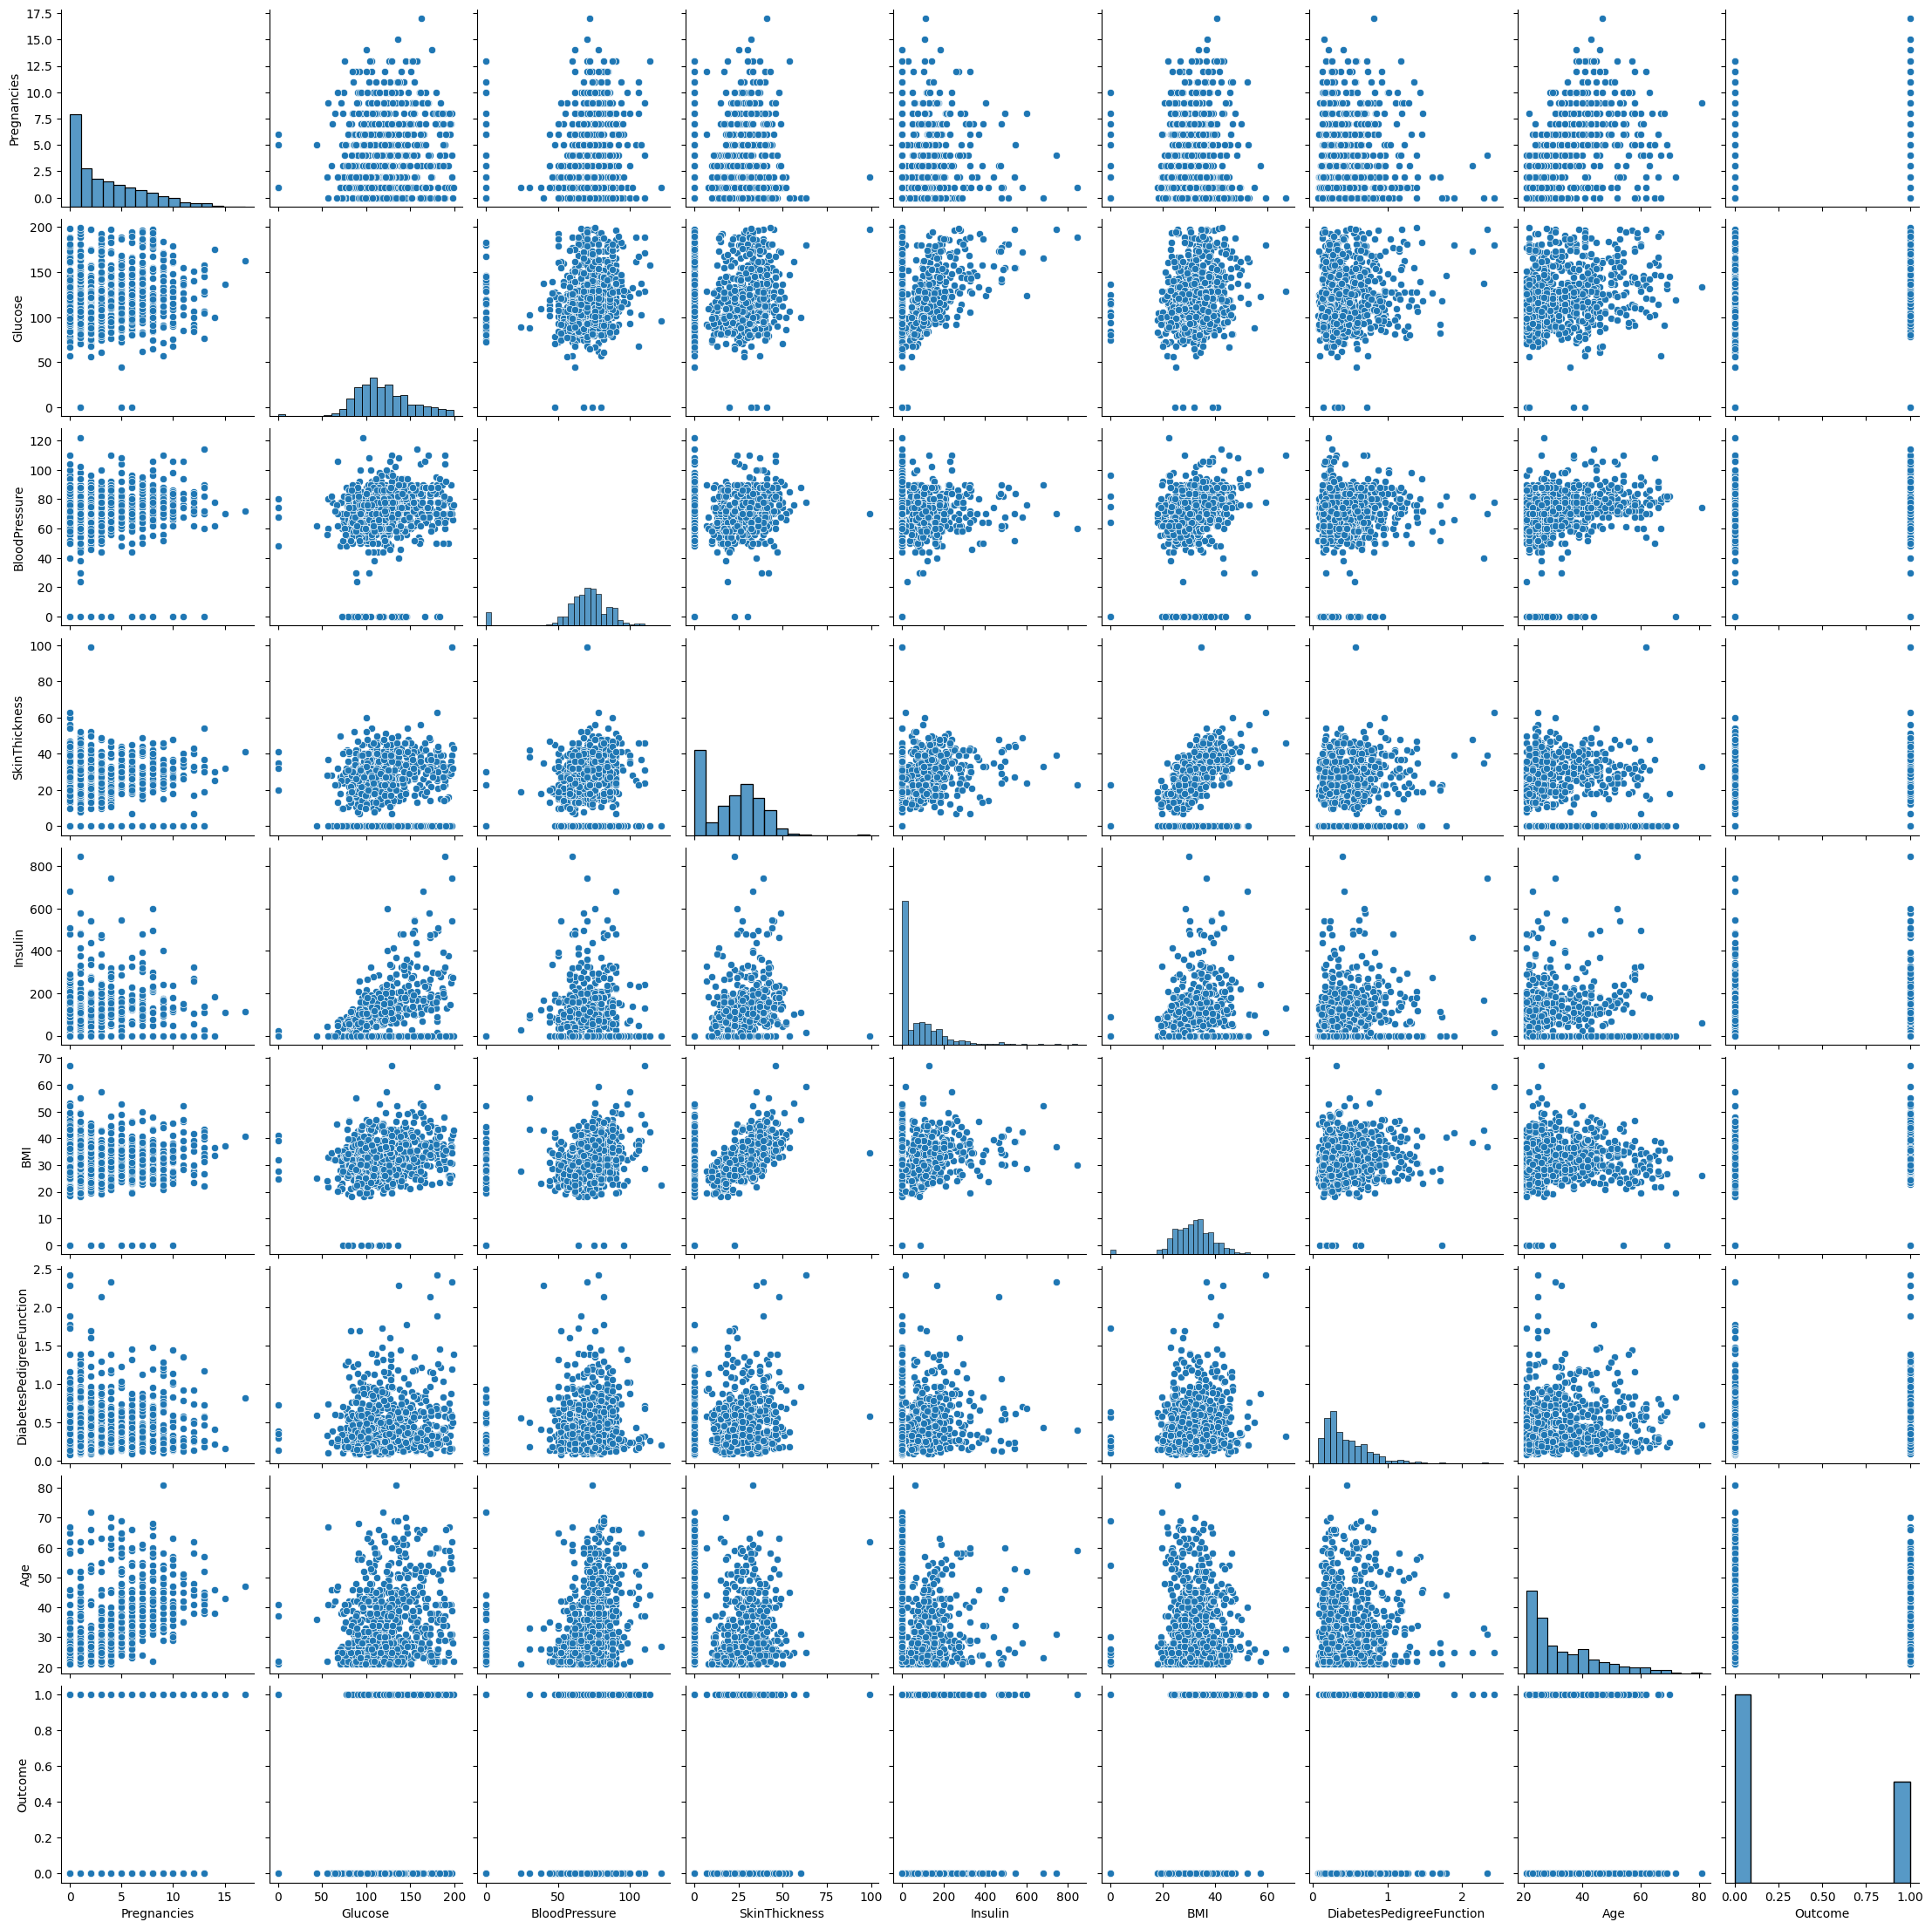

In [25]:
sns.pairplot(df)

### Correlation Analysis

In [26]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Observations

* Except Glucose level significant correlation with Outcome not found in any other features.
* Pregnancies has moderate positive correlation with Age.
* Skin Thickness has moderate positive correlation with Insulin and BMI.

#### Outlier Detection

In [27]:
def outliers(data):
  q1 = np.quantile(data, 0.25)
  q3 = np.quantile(data, 0.75)

  iqr = q3 - q1
  le = q1 - 1.5 * iqr
  ue = q3 + 1.5 * iqr

  low = data[data < le]
  high = data[data > ue]

  return list(low), list(high)

In [28]:
for col in df.columns:
  if col != 'Outcome':
    a, b = outliers(df[col].values)
    print(f"Column Name: {col}")
    print(f"Number of outliers below lower range: {len(a)}")
    print(f"Number of outliers above higher range: {len(b)}")
    if len(a)> 0 or len(b)> 0:
      print(f"Outliers below lower range: {sorted(a)}")
      print(f"Outliers above higher range: {sorted(b)}")
    print("-"*60)

Column Name: Pregnancies
Number of outliers below lower range: 0
Number of outliers above higher range: 4
Outliers below lower range: []
Outliers above higher range: [14, 14, 15, 17]
------------------------------------------------------------
Column Name: Glucose
Number of outliers below lower range: 5
Number of outliers above higher range: 0
Outliers below lower range: [0, 0, 0, 0, 0]
Outliers above higher range: []
------------------------------------------------------------
Column Name: BloodPressure
Number of outliers below lower range: 38
Number of outliers above higher range: 7
Outliers below lower range: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 24, 30, 30]
Outliers above higher range: [108, 108, 110, 110, 110, 114, 122]
------------------------------------------------------------
Column Name: SkinThickness
Number of outliers below lower range: 0
Number of outliers above higher range: 1
Outliers below lower range: 

In [29]:
df[df["Pregnancies"].isin([14, 14, 15, 17])]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
88,15,136,70,32,110,37.1,0.153,43,1
159,17,163,72,41,114,40.9,0.817,47,1
298,14,100,78,25,184,36.6,0.412,46,1
455,14,175,62,30,0,33.6,0.212,38,1


### Outlier Imputation

In [30]:
# As Glucose level is an integer quantity we can impute median for the outliers
med = df['Glucose'].median()
df['Glucose']
df1 = df.copy()

a, b = outliers(df1["Glucose"].values)
df1['Glucose'] = df1['Glucose'].apply(lambda x: med if x in a else x)
df1['Glucose']
# a, b = outliers(df1["Glucose"].values)

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [31]:
# As Blood Pressure is an integer quantity we can impute median for outliers
med = df1['BloodPressure'].median()
print(f"Median:{med}")
df2 = df1.copy()
a, b = outliers(df1['BloodPressure'])
df2["BloodPressure"] = df1["BloodPressure"].apply(lambda x: med if x in a else x)
a, b= outliers(df2["BloodPressure"].values)

Median:72.0


In [32]:
# As BMI is an float quantity we can impute mean for outliers
mean = df2['BMI'].mean()
print(f"Mean:{mean}")
df3 = df2.copy()
a, b = outliers(df2['BMI'].values)
df3["BMI"] = df1["BMI"].apply(lambda x: mean if (x in a) or (x in b) else x)
a, b= outliers(df3["BMI"].values)
a

Mean:31.992578124999998


[]

In [33]:
# Impute most frequent number of Pregnancies at the age where outliers present
mode = df[(df['Age'] >= 38) & (df['Age'] <= 47)]['Pregnancies'].mode()[0]
df4 = df3.copy()
a,b = outliers(df4['Pregnancies'].values)
df4["Pregnancies"] = df4["Pregnancies"].apply(lambda x: mode if x in b else x)

## Hypothesis Testing

### Prove (or Disprove) BMI level is higher in diabetes patients.

* Null Hypothesis(H0): BMI of diabetes patients and non diabetes patients are same.
* Alternate Hypothesis(H1): BMI level is higher in diabetes patients.

#### Two Sample T-Test

##### Assumptions

Before conducting the two-sample t-test using Python let us discuss the assumptions of this parametric test. Basically, there are three assumptions that we can make regarding the data groups:

* Whether the two samples data groups are independent.
* Whether the data elements in respective groups follow any normal distribution.
* Whether the given two samples have similar variances. This assumption is also known as the homogeneity assumption.

In [34]:
import scipy.stats as stats

In [35]:
x = df4[df4["Outcome"] == 0]["BMI"].values
y = df4[df4["Outcome"] == 1]["BMI"].values

In [36]:
print(f" Variance df BMI of non-diabetes patient: {x.var()}")
print(f" Variance df BMI of diabetes patient: {y.var()}")
print(f"Ratio of variance: {x.var()/y.var()}")

 Variance df BMI of non-diabetes patient: 39.88806471800477
 Variance df BMI of diabetes patient: 32.56609535392341
Ratio of variance: 1.2248341191815384


In [37]:
ttest = stats.ttest_ind(a= x, b= y, equal_var= True)
print(f"P-Value: {ttest[1]}")
if ttest[1] < 0.05:
  print(f"BMI level is higher in diabetes patients. Alternate Hypothesis is accepted")
else:
  print(f"BMI of diabetes patients and non diabetes patients are same. Null Hypothesis is accepted")

P-Value: 1.667116830938011e-17
BMI level is higher in diabetes patients. Alternate Hypothesis is accepted


### Prove (or Disprove) Thickness of skin is more in diabetes patients.

* Null Hypothesis(H0): Thickness of skin is same for non-diabetes and diabetes patients.
* Alternate Hypothesis(H1): Thickness of skin is more in diabetes patients.

#### Two Sample T-Test

##### Assumptions

Before conducting the two-sample t-test using Python let us discuss the assumptions of this parametric test. Basically, there are three assumptions that we can make regarding the data groups:

* Whether the two samples data groups are independent.
* Whether the data elements in respective groups follow any normal distribution.
* Whether the given two samples have similar variances. This assumption is also known as the homogeneity assumption.

In [38]:
x = df4[df4["Outcome"] == 0]["SkinThickness"].values
y = df4[df4["Outcome"] == 1]["SkinThickness"].values

In [39]:
print(f"Variance of Skin Thickness in non-diabetes patients: {x.var()}")
print(f"Variance of Skin Thickness in diabetes patients: {y.var()}")
print(f"Ratio: {y.var()/x.var()}")


Variance of Skin Thickness in non-diabetes patients: 221.267104
Variance of Skin Thickness in diabetes patients: 311.40588104254846
Ratio: 1.4073754092363793


In [40]:
ttest = stats.ttest_ind(a=x, b= y, equal_var=True)
print(f"P-Value: {ttest[1]}")
if ttest[1] < 0.05:
  print(f"Thickness of skin is more in diabetes patients. Alternate Hypothese is accepted");
else:
  print(f"Thickness of skin is same for non-diabetes and diabetes patients. Null Hypothese is accepted");

P-Value: 0.03834770482049123
Thickness of skin is more in diabetes patients. Alternate Hypothese is accepted


### Prove( or Disprove) a significant difference in glucose levels between diabetic and non-diabetic patients.

* Null Hypothesis(H0): There is no difference in Glucose Level for diabetic and non-diabetic patients.
* Alternate Hypothesis(h1): There is a significant difference in glucose levels between diabetic and non-diabetic patients.

#### Two Sample T-Test

##### Assumptions

Before conducting the two-sample t-test using Python let us discuss the assumptions of this parametric test. Basically, there are three assumptions that we can make regarding the data groups:

* Whether the two samples data groups are independent.
* Whether the data elements in respective groups follow any normal distribution.
* Whether the given two samples have similar variances. This assumption is also known as the homogeneity assumption.



In [41]:
x = df4[df4["Outcome"] == 0]["Glucose"].values
y = df4[df4["Outcome"] == 1]["Glucose"].values
df4["Glucose"]

0      148.0
1       85.0
2      183.0
3       89.0
4      137.0
       ...  
763    101.0
764    122.0
765    121.0
766    126.0
767     93.0
Name: Glucose, Length: 768, dtype: float64

In [42]:
print(f"Variance of Glucose level in non-diabetes patients: {x.var()}")
print(f"Variance of Glucose lebel in diabetes patients: {y.var()}")
print(f"Ratio: {y.var()/x.var()}")


Variance of Glucose level in non-diabetes patients: 609.2248759999999
Variance of Glucose lebel in diabetes patients: 871.0538399420807
Ratio: 1.4297739213493326


In [43]:
ttest = stats.ttest_ind(a= x, b= y, equal_var= True)
print(f"P-Value: {ttest[1]}")
if ttest[1] < 0.05:
  print(f"There is a significant difference in glucose levels between diabetic and non-diabetic patients. Alternate Hypothese is accepted");
else:
  print(f"There is no difference in Glucose Level for diabetic and non-diabetic patients. Null Hypothese is accepted");

P-Value: 3.1287190418423694e-48
There is a significant difference in glucose levels between diabetic and non-diabetic patients. Alternate Hypothese is accepted


In [44]:
labels=["21-30", "31-40", "41-50", "51-60","60+"]
bins= [20, 30, 40, 50, 60, 70]
df4["AgeGroup"] = pd.cut(df4["Age"], bins= bins, labels=labels, right=False)


### Is there a significant association between age groups and diabetes outcome? (Chi Square Test)

* Null Hypothesis(H0): There is no relationship between Age and Outcome.
* Alternate Hypothesis(H1): There is a significant relationship between Age and Outcome.



In [45]:
cross_tab = pd.crosstab(df4["AgeGroup"], df4["Outcome"])
cross_tab

Outcome,0,1
AgeGroup,,
21-30,312,84
31-40,89,76
41-50,53,65
51-60,23,34
60+,21,8


In [46]:
from scipy.stats import chi2_contingency

In [47]:
chi2_score = chi2_contingency(observed=cross_tab)
chi2_score

Chi2ContingencyResult(statistic=78.90977928011324, pvalue=2.964354686649999e-16, dof=4, expected_freq=array([[257.78823529, 138.21176471],
       [107.41176471,  57.58823529],
       [ 76.81568627,  41.18431373],
       [ 37.10588235,  19.89411765],
       [ 18.87843137,  10.12156863]]))

In [48]:
if chi2_score[1] < 0.05:
  print(f"There is a significant relationship between Age and Outcome. Alternate Hypothese is accepted");
else:
  print(f"There is no relationship between Age and Outcome. Null Hypothese is accepted");

There is a significant relationship between Age and Outcome. Alternate Hypothese is accepted


## Insights Based on EDA

#### Comments on range of attributes and outliers of various attributes

* The data is based on **768** samples collected for female patients **21+** years old.
* There are **5** data points found having **0** Glucose level.
* There are **38** data points found having **0** Blood Pressure level.
* There are **34** data points found having **above 320** Insulin level.
* There are **11** data points found having **0** BMI and **8** data points **over 52**.
* There are **29** data points found in Diabetes Percentage having more than higher range **1.2**.
* There are **4** data points in number of pregnancies **above 14** at the age of 38 to 47 years.

#### Comments on univariate and bivariate plots

* There are **34.90%** samples have diabetes. As the difference between 2 classes is **30.2%(65.10 - 34.90)** so we can say it is a **modarate imbalance** dataset. Machine learning models might have a slight bias towards the majority class (65.1%) because it is more frequently represented.
* Age is normally distributed. Slightly right skewed above **50** years.
* Most of the diabetes patient found at the age **30 to 48** years.
* BMI is normally distributed.
* BMI of diabetes’ patients are higher than non- diabetes patients.
* Most of the diabetes patients have BMI between **30 to 40**.
* Glucose is normally distributed.
* Glucose or Blood Sugar level of diabetes’ patients are higher than non- diabetes patients.
* Most of the diabetes patients have Glucose Level **above 125**.

* Insulin is normally distributed. Slightly right skewed **above 300**.
* Most of the diabetes patients have Insulin level below **200**.

* Skin Thickness of diabetes patients are slightly higher.
* Most of the diabetes patients have skin thickness **35 to 40**.

* Diabetes Percentage is normally distributed. Slightly right skewed **above 1.0**.
* Diabetes Percentage is higher for diabetes patients than the non-diabetes' patients.
* Most of the diabetes patients have diabetes percentage **0.3**.

* Blood Pressure is normally distributed.
* Blood Pressure level of diabetes’ patients are slightly higher than non- diabetes patients.
* Most of the diabetes patients have Blood Pressure Level **75**.

* Pregnancies is normally distributed.
* Diabetes patients found mostly having **1 or more** pregnancies history.

#### Comments on Correlation Analysis

* Except Glucose level significant correlation with Outcome not found in any other features.
* Pregnancies has moderate positive correlation with Age.
* Skin Thickness has positive moderate correlation with Insulin and BMI.

#### Comments on Hypothesis Testing

* Using Two Sample T-Test it is found that **BMI** level is higher in diabetes patients.
* Using Two Sample T-Test it is found that **Thickness of skin** is more in diabetes patients.
* Using Two Sample T-Test it is found that there is a significant difference in **glucose** levels between diabetic and non-diabetic patients.
* Using Two Sample T-Test it is found that **Age** has a significant relationship with **Outcome**.

### Conclusion

By analysing this sample dataset we found that BMI, Glucose level, Thickness of skin and Age are most significant features to detect Diabetes.